# Overcoming a Theoretical Limitation of Self-Attention 

Replication of experiments on FIRST language learning from [Overcoming a Theoretical Limitation of Self-Attention  (Chiang and Cholak, 2022)](https://arxiv.org/pdf/2202.12172.pdf).

In [1]:
from src.transformer import FirstTransformer, FirstExactTransformer
import torch
import pandas as pd

Set the following to true to use the FirstExactTransformer, and to false to use FirstTransformer

In [2]:
EXACT = False

## Learning FIRST

Define training parameters as in the original paper. Citing from (David Chiang and Peter Cholak, 2020):
> We used `d_model` = 16 for word encodings, self-attention, and FFNN outputs, and `d_FFNN` = 64 for FFNN hidden layers. We used layer normalization (ε = 10^−5) after residual connections. We used PyTorch’s default initialization and trained using Adam (Kingma and Ba, 2015) with learning rate 3 × 10^−4 (Karpathy, 2016). We did not use dropout, as it did not seem to help.

In [7]:
vocab = ["0", "1", "$"]

epochs = 20
layers = 2
heads = 1 
if EXACT:
    d_model = 6 # do not change this!
else:
    d_model = 16
d_ffnn = 64  
eps = 1e-5 # value added to denominator in layer normalization
scaled = False

### Generalization experiment

Initialize the Transformer to learn FIRST.

In [8]:
transformer = \
    FirstExactTransformer(len(vocab), d_model) if EXACT \
    else FirstTransformer(len(vocab), layers, heads, d_model, d_ffnn, scaled, eps)
optim = torch.optim.Adam(transformer.parameters(), lr=0.0003)

Define model trainer and train the transformer.

In [10]:
from src.trainer import Trainer
from src.dataset import Dataset

trainset = Dataset(0, 100, 10, random_seed=42, train=True, data_type='first', variable_lenght=False)
testset = Dataset(0, 100, 1000,  random_seed=42,  train=False, data_type='first', variable_lenght=False)

trainer = Trainer(0, transformer, optim, vocab, epochs, trainset, testset, verbose=1)
train_l, val_l, train_acc, val_acc = trainer.train()

[Epoch 1] Train acc: 0.48 Train loss: 70.82251560688019, Test acc: 0.48 Test loss: 70.53018110990524
[Epoch 2] Train acc: 0.62 Train loss: 68.22715350985527, Test acc: 0.48 Test loss: 70.05497199296951
[Epoch 3] Train acc: 0.68 Train loss: 62.594036757946014, Test acc: 0.45 Test loss: 70.20428496599197
[Epoch 4] Train acc: 0.73 Train loss: 58.06704166531563, Test acc: 0.47 Test loss: 69.63091653585434
[Epoch 5] Train acc: 0.85 Train loss: 43.17119553685188, Test acc: 0.42 Test loss: 84.34749820828438
[Epoch 6] Train acc: 0.99 Train loss: 14.547088660299778, Test acc: 0.51 Test loss: 121.22422835230827
[Epoch 7] Train acc: 1.0 Train loss: 7.5821383446455, Test acc: 0.54 Test loss: 121.47382888942957
[Epoch 8] Train acc: 1.0 Train loss: 6.122796632349491, Test acc: 0.58 Test loss: 119.17250917106867
[Epoch 9] Train acc: 1.0 Train loss: 5.190062433481216, Test acc: 0.51 Test loss: 146.14726735278964
[Epoch 10] Train acc: 1.0 Train loss: 4.49142375215888, Test acc: 0.48 Test loss: 162.1278

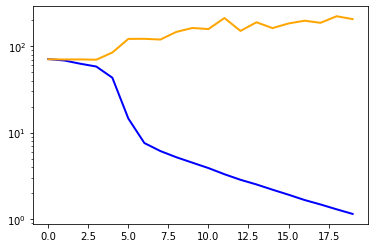

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(range(epochs), train_l, color='blue', lw=2)
plt.plot(range(epochs), val_l, color='orange', lw=2)
plt.yscale('log')
plt.show()

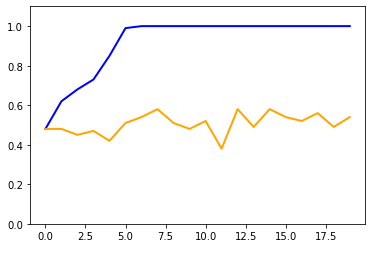

In [14]:
fig = plt.figure()
plt.plot(range(epochs), train_acc, color='blue', lw=2)
plt.plot(range(epochs), val_acc, color='orange', lw=2)
plt.ylim([0, 1.1])

ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, frameon=False, loc='lower center',  ncol=4)